# 3 Data integration in a single matrix (Ctrl)
#### Dataset1: Healthy - Arabidopsis (Col-0)

Cynthia Soto <br>
Fecha: 20 de Agosto 2020 <br>
Datatype representation: normalized values in log2 scale (genome name reference) <br>
Data quantify with HTSeq (alignments done with STAR SA)  <br>

Data quantifications produced with HTSeq are absolute counts. <br>
First data needed to be cleaned and transformed to a log2 scale. <br>
Now data-frames from the same reference-organims are going to be integrate in a single data matrix <br>

**Workflow:** <br>
1) Data assummed to be cleaned & in the same scale. (in this dataset is Log2) <br>
2) Gene_name is used as key to merge the n dataframes and retrieve the Log2 column of each dataset  <br>
3) Some basic statistics are build from the single matrix.  <br>
4) A soft trimming based on ceros across all samples is performed.  <br>


Pandas provides various facilities for easily combining together Series or DataFrame with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In addition, pandas also provides utilities to compare two Series or DataFrame and summarize their differences.

Letś to merge DataFrames on specific keys by different join logics like left-join, inner-join, etc.

In [94]:
# Libraries required
import os 
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [95]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    

s_path = str(os.getcwd())+'/*_Log2.csv'       
#print(os.listdir(os.getcwd())       

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts


***First letś try an example with two quantification files***

In [58]:
# Import Data (example with 2 cvs files)
df1=pd.read_csv("SRR3383640_Log2.csv", sep='\t', nrows=100, usecols=[1,3])
print(df1.shape)
## remove unnamed cols
df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
#print(df1.columns)
df1.rename(columns={'log2_value':'SRR3383640'},inplace=True)
#print(df1.size)
print(df1.shape)
df1.head(5)

(100, 2)
(100, 2)


,Genes,SRR3383640
0,AT1G01010,6.523562
1,AT1G01020,6.768184
2,AT1G01030,3.807355
3,AT1G01040,10.005625
4,AT1G01050,9.733015


In [59]:
## Import Data 
df2=pd.read_csv("SRR3383641_Log2.csv", sep='\t', nrows=100, usecols=[1,3])
## Removes unnamed cols
df2.drop(df2.columns[df2.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
df2.rename(columns={'log2_value':'SRR3383641'},inplace=True)
#print(df2.size)
print(df2.shape)
df2.head(5)

(100, 2)


,Genes,SRR3383641
0,AT1G01010,7.592457
1,AT1G01020,8.066089
2,AT1G01030,4.523562
3,AT1G01040,11.165535
4,AT1G01050,10.854868


Use numpy.where(condition, x, y) with condition as a boolean expression comparing two columns. For each row of the two columns, the corresponding element of the resulting NumPy array is x if condition is True, and y otherwise.

In [60]:
## Look if different gene_names exist in the files (df)
comparison_column = np.where(df1["Genes"] == df2["Genes"], True, False)
print (comparison_column)

## If True all gene_names are equal, otherwise result is False

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [61]:
## Look for 'False' bool in the comparison, if found means something is different. A false means all are true (equal)
False in comparison_column

False

In [62]:
df1=df1.merge(df2,on=['Genes'],how='left')
df1

,Genes,SRR3383640,SRR3383641
0,AT1G01010,6.523562,7.592457
1,AT1G01020,6.768184,8.066089
2,AT1G01030,3.807355,4.523562
3,AT1G01040,10.005625,11.165535
4,AT1G01050,9.733015,10.854868
...,...,...,...
95,AT1G01930,7.087463,8.189825
96,AT1G01940,6.392317,7.199672
97,AT1G01950,7.826548,9.041659
98,AT1G01960,10.314017,11.269711


## Now, letś to merge all the cvs data files (df) in a unique matrix 

In [118]:
## CREATE A SINGLE MATRIX

all_files = glob.glob(s_path)
## To load the main df
flag_b=True

for file in all_files:
    
    ## GET FILE NAME TO STORE STATISTICS
    f_name = file.split("_")
    x= f_name[1]
    f_name1=x.split("/")
    x1= f_name1[1]
    #print(x1)
    
    if flag_b:    ## load main df once
        #print(file)
        ## Main df is df1
        df1=pd.read_csv(file, sep='\t', usecols=[1,3])    ## nrows=100, 
        ## remove unnamed cols
        df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
        df1.rename(columns={'log2_value':x1},inplace=True)
        #print(df1) 
        flag_b=False
    else:
        #print(file)
        df2= pd.read_csv(file, sep='\t', usecols=[1,3])     ## nrows=100, 
        ## remove unnamed cols
        df2.drop(df2.columns[df2.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)      
        ## compare matrix gene_names before concatenated
        comparison_column = np.where(df1["Genes"] == df2["Genes"], True, False)
        if (False in comparison_column):
            print("Gene names not match in file " + file + ". will not be merged.")
        else:
            ## merge matrix based in column name "Genes"
            df2.rename(columns={'log2_value':x1},inplace=True)
            df1=df1.merge(df2,on=['Genes'],how='left')
        
    ## Send the concatenated matrix to all_Log2.csv for a statistical further analysis
    #df1.to_csv('all_samples_log2.csv', sep='\t', index=True)

In [119]:
df1

,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783
...,...,...,...,...,...,...,...,...,...
27650,ATMG01350,1.000000,1.584963,0.000000,3.000000,1.584963,1.000000,0.000000,3.169925
27651,ATMG01360,4.392317,4.807355,5.700440,6.554589,6.247928,4.807355,4.523562,6.392317
27652,ATMG01370,4.643856,5.129283,5.321928,5.832890,6.228819,4.169925,4.321928,4.321928
27653,ATMG01400,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


## Some statistic onto the unique matrix

1) Gene expression cvs files are integreted in one matrix<br>
2) Gene ID with cero counts in expression across all the samples are got it<br>
3) Gene IDs identifiers are dropped from the the sample df(s) to compose the dataset2. <br>

In [120]:
#Check number of zeros by sample
df1.isin([0]).sum()

Genes            0
SRR3383640    7396
SRR3383821    7360
SRR3383782    6888
SRR6283145    7688
SRR3383641    7039
SRR3383783    7627
SRR3383822    7702
SRR6283144    7700
dtype: int64

***Here, ceros are counted across genes in all samples & a zero-counter files is append to the end of the matrix*** <br>
In consequence, files (matrices) containing x number of genes with ceros will be created as need it. <br>
all_log2_counter_cero.csv contains the counter <br>
File example: <br>
all_log2_8_ceros.csv contains genes with ceros rangring from [1 to 8] <br>
all_log2_7_ceros.csv contains genes with ceros rangring from [1 to 7] <br>


In [121]:
s_zeros=(df1 == 0).astype(int).sum(axis=1)
#print(s_zeros)
#type(s_zeros)    ### build a serie-pandas
## Desglozando la formula
#(df1 == 0)
#(df1 == 0).astype(int)
#(df1 == 0).sum(axis=1)

## Added a column to df1 with the counter of zeros
df1['zero-counter'] = s_zeros
df1
## Send the integrated matrix to all_log2_counter_cero.csv 
#df1.to_csv('all_log2_counter_cero.csv', sep='\t', index=True)

,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,zero-counter
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795,0
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552,0
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440,0
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,0
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,0
...,...,...,...,...,...,...,...,...,...,...
27650,ATMG01350,1.000000,1.584963,0.000000,3.000000,1.584963,1.000000,0.000000,3.169925,2
27651,ATMG01360,4.392317,4.807355,5.700440,6.554589,6.247928,4.807355,4.523562,6.392317,0
27652,ATMG01370,4.643856,5.129283,5.321928,5.832890,6.228819,4.169925,4.321928,4.321928,0
27653,ATMG01400,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6


In [122]:
## Filter for looking rows with x number of ceros
is_zero = (df1['zero-counter']>=8)     
df1_8 = df1[is_zero]
print(df1_8.shape)
print(df1_8.head(7))
## Send the integrated matrix to all_log2_counter_cero.csv 
#df1_8.to_csv('all_log2_8_ceros.csv', sep='\t', index=True)

(5228, 10)
         Genes  SRR3383640  SRR3383821  SRR3383782  SRR6283145  SRR3383641  \
27   AT1G01280         0.0         0.0         0.0         0.0         0.0   
30   AT1G01305         0.0         0.0         0.0         0.0         0.0   
33   AT1G01335         0.0         0.0         0.0         0.0         0.0   
41   AT1G01400         0.0         0.0         0.0         0.0         0.0   
42   AT1G01410         0.0         0.0         0.0         0.0         0.0   
48   AT1G01460         0.0         0.0         0.0         0.0         0.0   
100  AT1G01980         0.0         0.0         0.0         0.0         0.0   

     SRR3383783  SRR3383822  SRR6283144  zero-counter  
27          0.0         0.0         0.0             8  
30          0.0         0.0         0.0             8  
33          0.0         0.0         0.0             8  
41          0.0         0.0         0.0             8  
42          0.0         0.0         0.0             8  
48          0.0         0.0 

In [123]:
df1_8.isin([0]).sum()

Genes              0
SRR3383640      5228
SRR3383821      5228
SRR3383782      5228
SRR6283145      5228
SRR3383641      5228
SRR3383783      5228
SRR3383822      5228
SRR6283144      5228
zero-counter       0
dtype: int64

## Does a soft trimming of data

**First, I drop identified genes with ceros across all the samples** <br>
1) All data are cleaned and normalized to log2<br>
2) First soft trimming: remove gene-IDs counting cero across all samples<br>
<br>
x = Si - 1 <br>
<br>
Donde:<br>
Si = es el numero de cero conteos traves del todas las muestras para un gen determinado<br>
Ejm: si el tamaño del conjunto es de 8 muestras, entonces 8 es el número máximo de ceros que puede tener un gen, asumiendo que no hubo expresión de ese gen para ninguna de las muestra. <br>
x =   es Si  -1


In [102]:
## Save the gene IDs with ceros in a file 
genes_cero_ToList = list(df1_8['Genes'])
with open("all_genesIDs_cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))

In [124]:
genes_cero_ToList
len(genes_cero_ToList)
#df1_8.head()

5228

In [125]:
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_8.index)
print(lst_genes_to_drop)

Int64Index([   27,    30,    33,    41,    42,    48,   100,   110,   126,
              137,
            ...
            27630, 27631, 27633, 27634, 27636, 27638, 27642, 27645, 27646,
            27647],
           dtype='int64', length=5228)


In [126]:
df1.head()     ## see idx=27,30 y 33 full of zeros

,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,zero-counter
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795,0
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552,0
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440,0
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,0
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,0


In [127]:
print(df1.shape)
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df1 = df1.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

(27655, 10)


In [128]:
print(df1.shape)
df1.head()

(22427, 10)


,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,zero-counter
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795,0
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552,0
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440,0
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,0
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,0


In [129]:
## Create a new file with ID genes with 8 ceros across all samples (100%) removed
#df1.to_csv('all_log2_dropped12ceros.csv', sep='\t', index=True)

## Now explore the new distributions without ceros across all samples
### Plot all the sample in one plot (histogram and KDE)

In [130]:
# load file to plot and format df to be plotted 

#print(os.listdir(os.getcwd()))
df_nozeros=pd.read_csv("all_log2_dropped8ceros.csv", sep='\t')
## remove unnamed cols
df_nozeros.drop(df_nozeros.columns[df_nozeros.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
# dropping not-useful columns 
df_nozeros.drop(["Genes", "zero-counter"], axis = 1, inplace = True) 
print(df_nozeros.head())

## Get sample list names
sample_lst=df_nozeros.columns
print(sample_lst)

   SRR3383640  SRR3383821  SRR3383782  SRR6283145  SRR3383641  SRR3383783  \
0    6.523562    7.055282    6.845490    6.266787    7.592457    5.857981   
1    6.768184    7.189825    7.813781    7.459432    8.066089    6.882643   
2    3.807355    3.321928    5.169925    4.392317    4.523562    3.807355   
3   10.005625    9.992938   11.214926   11.311748   11.165535   10.371777   
4    9.733015    9.419960   11.379920   10.581201   10.854868   10.250298   

   SRR3383822  SRR6283144  
0    6.066089    7.507795  
1    6.539159    7.357552  
2    4.087463    4.700440  
3    9.319672   11.283667  
4    8.668885   10.817783  
Index(['SRR3383640', 'SRR3383821', 'SRR3383782', 'SRR6283145', 'SRR3383641',
       'SRR3383783', 'SRR3383822', 'SRR6283144'],
      dtype='object')


Plot both the histogram and densities in the same plot with the seaborn package (imported as sns) which allows you to do that via the distplot(). 
Since seaborn is built on top of matplotlib, you can use the sns and plt one after the other.

Text(17, 0.25, 'Size:80%')

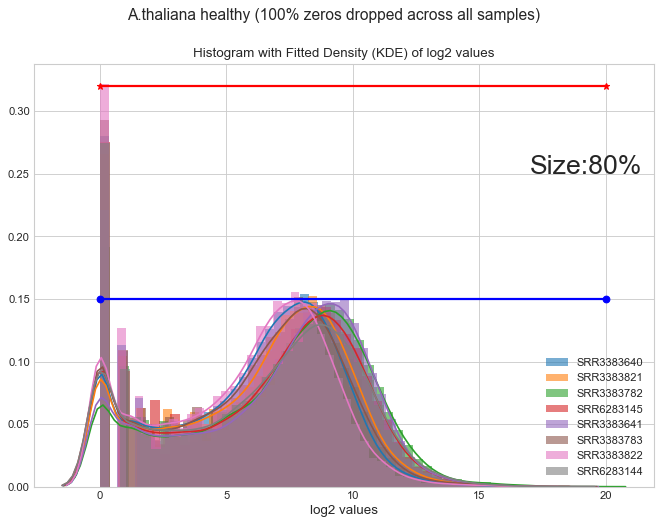

In [142]:
# Values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of log2 values',fontsize=12)
plt.xlabel('log2 values',fontsize=12)
plt.suptitle('A.thaliana healthy (100% zeros dropped across all samples)', fontsize=14)
plt.legend();

## add arbitrary lines to canvas
plt.plot([0, 20], [.15, .15], 'k-', lw=2, color='blue',marker = 'o')
plt.plot([0, 20], [.32, .32], 'k-', lw=2, color='red',marker = '*')
plt.text(17, .25, "Size:80%",fontsize=24)

#plt.savefig("../athal1_stats/all_fitted density_drop8zeros.png");

***Another trimming action of genes with 7 zeros across samples***

In [113]:
## Filter for looking rows with x number of ceros (second parse)
## Take the lastet dropped file to save cpu performance 

df_nozeros=pd.read_csv("all_log2_dropped8ceros.csv", sep='\t')
is_zero7 = (df_nozeros['zero-counter']>=7)     
#print(is_zero7)
df1_7 = df_nozeros[is_zero7]
print(" Match records: "+ str(df1_7.shape))
print(df1_7)

## Send the integrated matrix 
#df1_7.to_csv('all_log2_7_ceros.csv', sep='\t', index=True)

 Match records: (950, 11)
       Unnamed: 0      Genes  SRR3383640  SRR3383821  SRR3383782  SRR6283145  \
14             14  AT1G01150    0.000000         0.0         1.0    0.000000   
102           109  AT1G02065    0.000000         0.0         0.0    2.000000   
120           129  AT1G02250    2.807355         0.0         0.0    0.000000   
146           156  AT1G02490    1.000000         0.0         0.0    0.000000   
151           164  AT1G02570    0.000000         0.0         0.0    0.000000   
...           ...        ...         ...         ...         ...         ...   
22409       27627  ATMG01110    0.000000         0.0         0.0    1.000000   
22415       27639  ATMG01240    0.000000         0.0         0.0    0.000000   
22416       27640  ATMG01250    0.000000         0.0         0.0    0.000000   
22417       27641  ATMG01260    0.000000         0.0         0.0    2.000000   
22418       27643  ATMG01275    0.000000         0.0         0.0    1.584963   

       SRR338

In [114]:
df1_7.isin([0]).sum()

Unnamed: 0        0
Genes             0
SRR3383640      846
SRR3383821      843
SRR3383782      778
SRR6283145      806
SRR3383641      793
SRR3383783      872
SRR3383822      871
SRR6283144      841
zero-counter      0
dtype: int64

In [39]:
## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_7['Genes'])

with open("all_genesIDs_7cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))

In [115]:
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_7.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped7ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Current dimensions:  (22427, 11)
New dimensions:  (21477, 11)


***Plot again to see the new distribution***

In [116]:
## sample names
sample_lst

Index(['SRR3383640', 'SRR3383821', 'SRR3383782', 'SRR6283145', 'SRR3383641',
       'SRR3383783', 'SRR3383822', 'SRR6283144'],
      dtype='object')

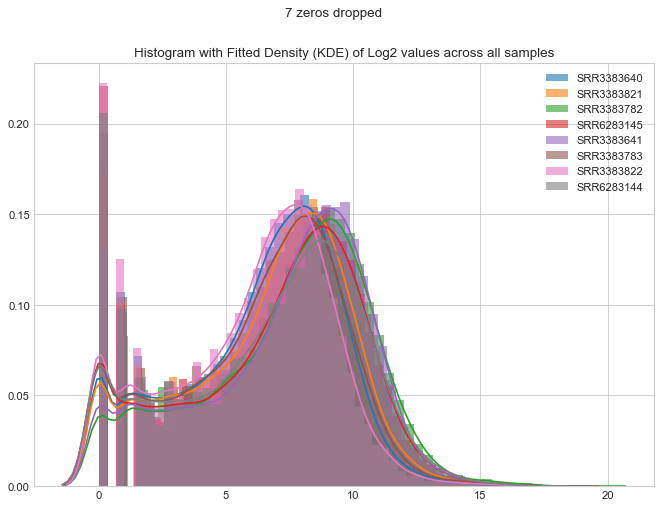

In [117]:
plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("7 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop7zeros.png");

***Another trimming action of genes with 6 zeros across samples***

In [44]:
## Filter for looking rows with x number of ceros (second parse)
## Take the latest dropped file to save cpu performance 

df_nozeros=pd.read_csv("all_log2_dropped7ceros.csv", sep='\t')
is_zero6 = (df_nozeros['zero-counter']>=6)     
#print(is_zero6)
df1_6 = df_nozeros[is_zero6]
print(" Match records: "+ str(df1_6.shape))
#print(df1_6)
## Send the integrated matrix 
df1_6.to_csv('all_log2_6_ceros.csv', sep='\t', index=True)

 Match records: (610, 12)


In [45]:
## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_6['Genes'])

with open("all_genesIDs_6cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_6.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped6ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Current dimensions:  (21477, 12)
New dimensions:  (20867, 12)


***Plot again to see the new distribution***

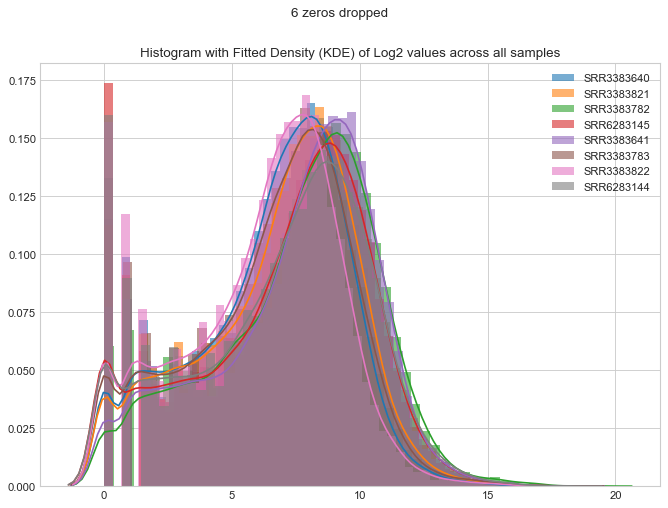

In [46]:
#Values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("6 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop6zeros.png");

In [47]:
## Another round dropping 5
df_nozeros=pd.read_csv("all_log2_dropped6ceros.csv", sep='\t')
is_zero5 = (df_nozeros['zero-counter']>=5)     
#print(is_zero5)
df1_5 = df_nozeros[is_zero5]
print("Match records: "+ str(df1_5.shape))
## Send to file 
df1_5.to_csv('all_log2_5_ceros.csv', sep='\t', index=True)

## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_5['Genes'])

## write the GeneIDs to a file 
with open("all_genesIDs_5cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_5.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped5ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Match records: (472, 13)
Current dimensions:  (20867, 13)
New dimensions:  (20395, 13)


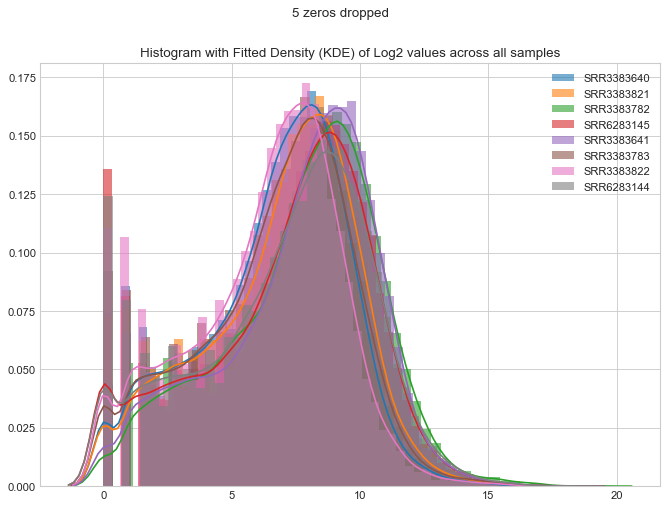

In [48]:
## Plot again 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("5 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop5zeros.png");

In [49]:
## Another round dropping 4
df_nozeros=pd.read_csv("all_log2_dropped5ceros.csv", sep='\t')
is_zero4 = (df_nozeros['zero-counter']>=4)     
#print(is_zero4)
df1_4 = df_nozeros[is_zero4]
print("Match records: "+ str(df1_4.shape))
## Send to file 
df1_4.to_csv('all_log2_4_ceros.csv', sep='\t', index=True)

## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_4['Genes'])

## write the GeneIDs to a file 
with open("all_genesIDs_4cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_4.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped4ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Match records: (389, 14)
Current dimensions:  (20395, 14)
New dimensions:  (20006, 14)


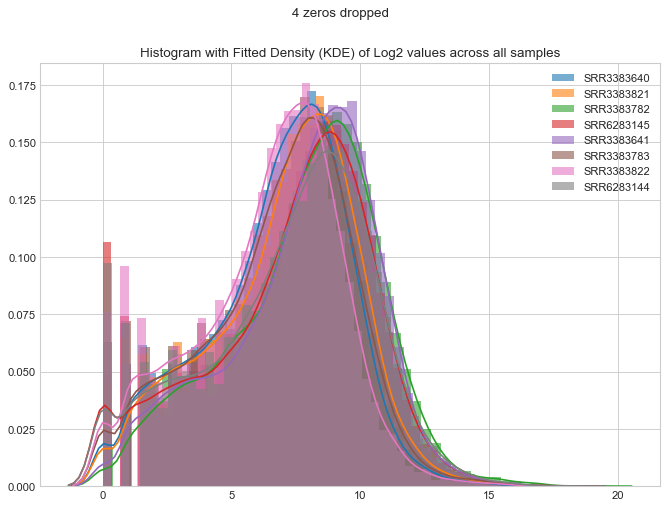

In [50]:
## Plot again 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("4 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop4zeros.png");

In [51]:
## Another round dropping 3
df_nozeros=pd.read_csv("all_log2_dropped4ceros.csv", sep='\t')
is_zero3 = (df_nozeros['zero-counter']>=3)     
#print(is_zero3)
df1_3 = df_nozeros[is_zero3]
print("Match records: "+ str(df1_3.shape))
## Send to file 
df1_3.to_csv('all_log2_3_ceros.csv', sep='\t', index=True)

## Save the gene IDs with cero in a file 
genes_cero_ToList = list(df1_3['Genes'])

## write the GeneIDs to a file 
with open("all_genesIDs_3cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))
    
## Get the index number of the gene rows to delete it from df
lst_genes_to_drop=(df1_3.index)

print("Current dimensions: ",str(df_nozeros.shape))
## Drop the Gene-IDs provided
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df_nozeros = df_nozeros.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped"

# Save the result to a new file of Si-1 
df_nozeros.to_csv('all_log2_dropped3ceros.csv', sep='\t', index=True)
print("New dimensions: ",str(df_nozeros.shape))

Match records: (447, 15)
Current dimensions:  (20006, 15)
New dimensions:  (19559, 15)


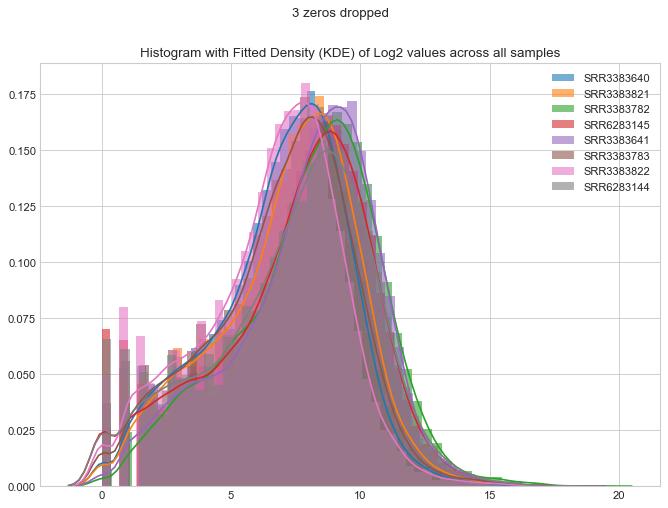

In [52]:
## Plot again 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)
    sample_data = df_nozeros[file].tolist()
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of Log2 values across all samples');
plt.suptitle("3 zeros dropped")
plt.legend();
#plt.savefig("../athal1_stats/all_fitted density_drop3zeros.png");